In [1]:
import gwsurrogate
import numpy as np

from math import cos
from math import sin
from math import sqrt
from math import factorial
from math import pi
from math import e
from numpy import conj

import bilby
import gwpy
import WaVel

import matplotlib.pyplot as plt
%matplotlib inline

# Define constants: speed of light (in m/s), gravitational constant (in m^3/(kg*s^2)), solar mass (in kg) and megaparsec (in m)
c = 2.99e8
G = 6.67e-11
M_sun = 1.99e30
Mpc = 3.09e22

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
import com_fdomain.functions as func

Loaded NRHybSur3dq8 model


In [3]:
moving_bbh = func.moving_bbh

In [11]:
1126259600.-4.0+0.02+2.0

1126259598.02

In [5]:
# Define labels, sampling frequency and times
outdir = 'outdir'
label = 'moving_bbh'
sampling_frequency = 1024
duration = 4.0
geocent_time = 1126259600.
start_time = geocent_time - duration + 0.02
dt = 1/sampling_frequency
#frequency domain
# Load the surrogate model
surrogate = gwsurrogate.LoadSurrogate('NRHybSur3dq8')


Loaded NRHybSur3dq8 model


In [9]:
# using gwpy time-series fft
#frequency domain
# Define the time-domain model
dt = 1/sampling_frequency
time_array_ = np.arange(0.0-duration+0.02,0.02,dt)
def moving_bbh(freq_array, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):
    #len(times)=duration*sampling_frequency
    times = time_array_
    
    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = gwpy.timeseries.TimeSeries(fplus.WaVe()[0], t0=start_time,\
                                        dt=dt, name='Strain', channel=None)
    h_cross = gwpy.timeseries.TimeSeries(fplus.WaVe()[1], t0=start_time,\
                                        dt=dt, name='Strain', channel=None)
    
    fplus = h_plus.fft()
    fcross = h_cross.fft()
    
    print(times[0],times[-1],times[1]-times[0],len(times))
    print(freq_array[0],freq_array[-1],freq_array[1]-freq_array[0],len(freq_array))

    return {'plus': fplus.value, 'cross': fcross.value}

In [17]:
#frequency domain
# Define the time-domain model

time_array_ = np.arange(start_time,start_time+duration,dt)
def moving_bbh(freq_array, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):
    #len(times)=duration*sampling_frequency
    times = time_array_
    
    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]
    
    n = len(times)
    upto = int(n/2)+1
    freqs = np.fft.fftfreq(n)
    fplus = np.fft.fft(h_plus)
    fplus = 2*(fplus/n)
    fplus = fplus[:upto]
   
    fcross = np.fft.fft(h_cross)
    fcross = 2*(fcross/n)
    fcross = fcross[:upto]
    
    print(times[0],times[-1],times[1]-times[0],len(times))
    print(freq_array[0],freq_array[-1],freq_array[1]-freq_array[0],len(freq_array))

    return {'plus': fplus, 'cross': fcross}

In [3]:
#time domian
# Define the time-domain model
def moving_bbh(times, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):
    
    times = times - geocent_time
    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]
    
    #print(times[0],times[-1],times[1]-times[0],len(times))
    
    return {'plus': h_plus, 'cross': h_cross}

In [19]:
ff = moving_bbh(np.arange(start_time,start_time+duration,dt),650,6,300,45,45,3000,0,0) 

-3.0 0.01953125 0.0009765625 3093
1180002599.02 1180002601.0190234 0.0009765625 2048


In [5]:
ff['plus']

array([3.56246332e-21, 3.58546868e-21, 3.60695531e-21, ...,
       3.46360409e-21, 2.00221994e-21, 4.76766657e-22])

In [7]:
np.linspace(-1.98,0.01902344,1)

array([-1000.,  -900.,  -800.,  -700.,  -600.,  -500.,  -400.,
        -300.,  -200.,  -100.])

In [10]:
#for 10 time points
import time 

t0 = time.time()
ff = moving_bbh(np.arange(start_time,start_time+duration,dt),650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

-3.98 0.019023437500000018 0.0009765625 4096
1180002597.02 1180002601.0190234 0.0009765625 4096
Execution took 2.0914


In [3]:
import time 

t0 = time.time()
ff = com_fdomain.functions.moving_bbh([-100,-20],650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 1.3994


In [6]:
#custom package frequency domain
injection_parameters = dict(total_mass=50, mass_ratio=6, luminosity_distance=300, theta_jn=45, psi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, geocent_time=geocent_time)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, frequency_domain_source_model=moving_bbh, start_time=start_time)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

05:57 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: com_fdomain.functions.moving_bbh
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
05:57 bilby INFO    : Injected signal in H1:
05:57 bilby INFO    :   optimal SNR = 14.65
05:57 bilby INFO    :   matched filter SNR = 12.81-0.27j
05:57 bilby INFO    :   total_mass = 50
05:57 bilby INFO    :   mass_ratio = 6
05:57 bilby INFO    :   luminosity_distance = 300
05:57 bilby INFO    :   theta_jn = 45
05:57 bilby INFO    :   psi = 45
05:57 bilby INFO    :   speed = 3000
05:57 bilby INFO    :   v_the = 0
05:57 bilby INFO    :   v_phi = 0
05:57 bilby INFO    :   ra = 0
05:57

[{'plus': array([8.73192938e-26+0.00000000e+00j,
         1.72589534e-25+1.35055739e-26j,
         1.69317457e-25+2.30066864e-26j, ...,
         1.24835712e-25-5.07044882e-27j,
         1.24948497e-25-2.53642698e-27j,
         1.24986106e-25+0.00000000e+00j]),
  'cross': array([-3.37095088e-25+0.00000000e+00j,
         -6.78477448e-25+1.02805674e-26j,
         -6.86546299e-25+1.34733553e-26j, ...,
          5.39768679e-26-3.76215350e-27j,
          5.40780835e-26-1.88220700e-27j,
          5.41118355e-26+0.00000000e+00j])},
 {'plus': array([8.73192938e-26+0.00000000e+00j,
         1.72589534e-25+1.35055739e-26j,
         1.69317457e-25+2.30066864e-26j, ...,
         1.24835712e-25-5.07044882e-27j,
         1.24948497e-25-2.53642698e-27j,
         1.24986106e-25+0.00000000e+00j]),
  'cross': array([-3.37095088e-25+0.00000000e+00j,
         -6.78477448e-25+1.02805674e-26j,
         -6.86546299e-25+1.34733553e-26j, ...,
          5.39768679e-26-3.76215350e-27j,
          5.40780835e-26-1.

In [12]:
#frequency domain
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, frequency_domain_source_model=moving_bbh, start_time=start_time)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

05:56 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: com_fdomain.functions.moving_bbh
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


KeyError: 'total_mass'

In [6]:
#time domain
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, time_domain_source_model=moving_bbh, start_time=start_time)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)


01:19 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.moving_bbh
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
01:19 bilby INFO    : Injected signal in H1:
01:19 bilby INFO    :   optimal SNR = 7.56
01:19 bilby INFO    :   matched filter SNR = 6.07+1.23j
01:19 bilby INFO    :   mass = 50
01:19 bilby INFO    :   ratio = 6
01:19 bilby INFO    :   distance = 300
01:19 bilby INFO    :   theta = 45
01:19 bilby INFO    :   phi = 45
01:19 bilby INFO    :   speed = 3000
01:19 bilby INFO    :   v_the = 0
01:19 bilby INFO    :   v_phi = 0
01:19 bilby INFO    :   ra = 0
01:19 bilby INFO    :   dec = 0
01:19 bilby I

[{'plus': array([3.60720309e-25+0.00000000e+00j,
         3.46942806e-25+3.84932907e-26j,
         3.45881752e-25+5.41420943e-26j, ...,
         5.04839256e-25-5.39859923e-26j,
         5.07308171e-25-2.70419393e-26j,
         5.08132002e-25+0.00000000e+00j]),
  'cross': array([-1.23139809e-24+0.00000000e+00j,
         -1.25484231e-24+2.16567669e-26j,
         -1.25500328e-24+1.03903647e-26j, ...,
          4.76026745e-26-3.33369914e-28j,
          4.74428986e-26-1.59865314e-28j,
          4.73894557e-26+0.00000000e+00j])},
 {'plus': array([3.60720309e-25+0.00000000e+00j,
         3.46942806e-25+3.84932907e-26j,
         3.45881752e-25+5.41420943e-26j, ...,
         5.04839256e-25-5.39859923e-26j,
         5.07308171e-25-2.70419393e-26j,
         5.08132002e-25+0.00000000e+00j]),
  'cross': array([-1.23139809e-24+0.00000000e+00j,
         -1.25484231e-24+2.16567669e-26j,
         -1.25500328e-24+1.03903647e-26j, ...,
          4.76026745e-26-3.33369914e-28j,
          4.74428986e-26-1.

In [31]:
time_array_

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [17]:
H1.amplitude_spectral_density_array

array([           inf,            inf,            inf, ...,
       3.24661286e-24, 3.24750448e-24, 3.24839586e-24])

01:19 bilby INFO    : Injected signal in H1:
01:19 bilby INFO    :   optimal SNR = 7.56
01:19 bilby INFO    :   matched filter SNR = 13.63+1.23j
01:19 bilby INFO    :   mass = 50
01:19 bilby INFO    :   ratio = 6
01:19 bilby INFO    :   distance = 300
01:19 bilby INFO    :   theta = 45
01:19 bilby INFO    :   phi = 45
01:19 bilby INFO    :   speed = 3000
01:19 bilby INFO    :   v_the = 0
01:19 bilby INFO    :   v_phi = 0
01:19 bilby INFO    :   ra = 0
01:19 bilby INFO    :   dec = 0
01:19 bilby INFO    :   psi = 0
01:19 bilby INFO    :   geocent_time = 1180002601.0
01:19 bilby INFO    : Injected signal in L1:
01:19 bilby INFO    :   optimal SNR = 26.05
01:19 bilby INFO    :   matched filter SNR = 52.22+1.16j
01:19 bilby INFO    :   mass = 50
01:19 bilby INFO    :   ratio = 6
01:19 bilby INFO    :   distance = 300
01:19 bilby INFO    :   theta = 45
01:19 bilby INFO    :   phi = 45
01:19 bilby INFO    :   speed = 3000
01:19 bilby INFO    :   v_the = 0
01:19 bilby INFO    :   v_phi = 0
01

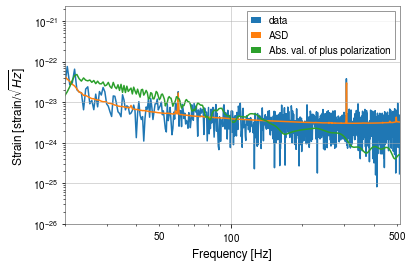

In [7]:
#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(20.,512.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [8]:
# Create priors
prior = injection_parameters.copy()
prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
#prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
# Define likelihood
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
# Launch sampler
result = bilby.core.sampler.run_sampler(likelihood, prior, sampler='dynesty', npoints=500, \
                                        injection_parameters=injection_parameters, \
                                        outdir=outdir, label=label, dlogz=3, npool=4)

01:20 bilby INFO    : Running for label 'moving_bbh', output will be saved to 'outdir'
01:20 bilby INFO    : Using lal version 7.1.2
01:20 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:20 bilby INFO    : Using lalsimulation version 2.5.1
01:20 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:20 bilby INFO    : Search parameters:
01:20 bilby INFO    :   mass = Uniform(minimum=45, maximum=55, name='$M$', latex_label='$M$', unit='$M_sun$', boundary=None)
01:20 bilby INFO    :   ratio = 6
01:20 bilby INFO    :   distance = 300
01:20 bilby INFO    :   theta = 45
01:20 bilby INFO    :   phi = 45
01:20 bilby INFO    :   speed = 3000
01:20 bilby INFO    :   v_the = 0
01:20 bilby INFO    :   v_p

0it [00:00, ?it/s]

01:21 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 4, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f5793785b10>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
01:21 bilby INFO    : Checkpoint every check_point_delta_t = 600s
01:21 bilby INFO    : Using dynesty version 1.0.1
01:21 bilby INFO    : Generating initial points from the prior

1081it [25:33, 20.37s/it, bound:0 nc: 38 ncall:4.9e+03 eff:22.2% logz-ratio=517.96+/-0.17 dlogz:3482.992>3]

01:47 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
01:47 bilby WARNING : Axis limits cannot be NaN or Inf
01:47 bilby WARNING : Failed to create dynesty run plot at checkpoint


1130it [41:22, 28.41s/it, bound:0 nc: 17 ncall:5.9e+03 eff:19.2% logz-ratio=563.70+/-0.17 dlogz:3437.041>3]

02:03 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
02:03 bilby WARNING : Axis limits cannot be NaN or Inf
02:03 bilby WARNING : Failed to create dynesty run plot at checkpoint


1164it [59:59, 85.55s/it, bound:0 nc:139 ncall:7.0e+03 eff:16.7% logz-ratio=630.33+/-0.18 dlogz:3372.012>3]

02:21 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
02:21 bilby WARNING : Axis limits cannot be NaN or Inf
02:21 bilby WARNING : Failed to create dynesty run plot at checkpoint


1197it [1:18:28, 56.73s/it, bound:0 nc:126 ncall:8.0e+03 eff:14.9% logz-ratio=656.95+/-0.17 dlogz:3344.026>3]

02:40 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
02:40 bilby WARNING : Axis limits cannot be NaN or Inf
02:40 bilby WARNING : Failed to create dynesty run plot at checkpoint


1233it [1:35:57, 60.70s/it, bound:0 nc: 87 ncall:9.0e+03 eff:13.6% logz-ratio=701.23+/-0.17 dlogz:3299.566>3]

02:57 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
02:57 bilby WARNING : Axis limits cannot be NaN or Inf
02:57 bilby WARNING : Failed to create dynesty run plot at checkpoint


1266it [1:54:08, 32.80s/it, bound:0 nc: 58 ncall:1.0e+04 eff:12.5% logz-ratio=782.92+/-0.18 dlogz:3218.174>3]

03:15 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
03:15 bilby WARNING : Axis limits cannot be NaN or Inf
03:15 bilby WARNING : Failed to create dynesty run plot at checkpoint


1303it [2:13:08, 103.20s/it, bound:0 nc:236 ncall:1.1e+04 eff:11.6% logz-ratio=841.55+/-0.17 dlogz:3159.130>3]

03:34 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
03:34 bilby WARNING : Axis limits cannot be NaN or Inf
03:34 bilby WARNING : Failed to create dynesty run plot at checkpoint


1322it [2:31:11, 62.84s/it, bound:0 nc: 70 ncall:1.2e+04 eff:10.8% logz-ratio=868.94+/-0.18 dlogz:3131.854>3] 

03:52 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
03:52 bilby WARNING : Axis limits cannot be NaN or Inf
03:52 bilby WARNING : Failed to create dynesty run plot at checkpoint


1351it [2:51:14, 52.63s/it, bound:0 nc: 57 ncall:1.3e+04 eff:10.1% logz-ratio=895.56+/-0.18 dlogz:3105.422>3]

04:12 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
04:12 bilby WARNING : Axis limits cannot be NaN or Inf
04:12 bilby WARNING : Failed to create dynesty run plot at checkpoint


1359it [3:44:57, 898.12s/it, bound:1 nc:500 ncall:1.4e+04 eff:9.6% logz-ratio=908.36+/-0.20 dlogz:3096.802>3]

05:06 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
05:06 bilby WARNING : Axis limits cannot be NaN or Inf
05:06 bilby WARNING : Failed to create dynesty run plot at checkpoint


1367it [4:25:09, 549.14s/it, bound:9 nc:500 ncall:1.8e+04 eff:7.5% logz-ratio=917.85+/-0.18 dlogz:3083.905>3]

05:46 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
05:46 bilby WARNING : Axis limits cannot be NaN or Inf
05:46 bilby WARNING : Failed to create dynesty run plot at checkpoint


1375it [5:09:24, 428.43s/it, bound:17 nc:500 ncall:2.2e+04 eff:6.2% logz-ratio=929.00+/-0.18 dlogz:3071.806>3]

06:31 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
06:31 bilby WARNING : Axis limits cannot be NaN or Inf
06:31 bilby WARNING : Failed to create dynesty run plot at checkpoint


1383it [5:55:55, 329.91s/it, bound:25 nc:500 ncall:2.6e+04 eff:5.3% logz-ratio=938.12+/-0.18 dlogz:3062.454>3]

07:17 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
07:17 bilby WARNING : Axis limits cannot be NaN or Inf
07:17 bilby WARNING : Failed to create dynesty run plot at checkpoint


1391it [6:42:21, 301.05s/it, bound:34 nc:995 ncall:3.1e+04 eff:4.5% logz-ratio=944.59+/-0.18 dlogz:3056.318>3]

08:04 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:04 bilby WARNING : Axis limits cannot be NaN or Inf
08:04 bilby WARNING : Failed to create dynesty run plot at checkpoint


1397it [7:27:43, 351.76s/it, bound:41 nc:1000 ncall:3.4e+04 eff:4.1% logz-ratio=951.77+/-0.19 dlogz:3049.849>3]

08:49 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:49 bilby WARNING : Axis limits cannot be NaN or Inf
08:49 bilby WARNING : Failed to create dynesty run plot at checkpoint


1402it [8:08:34, 356.41s/it, bound:49 nc:1495 ncall:3.8e+04 eff:3.7% logz-ratio=955.52+/-0.18 dlogz:3045.178>3]

09:30 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:30 bilby WARNING : Axis limits cannot be NaN or Inf
09:30 bilby WARNING : Failed to create dynesty run plot at checkpoint


1408it [8:48:57, 320.58s/it, bound:57 nc:495 ncall:4.2e+04 eff:3.3% logz-ratio=961.36+/-0.18 dlogz:3039.044>3] 

10:10 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
10:10 bilby WARNING : Axis limits cannot be NaN or Inf
10:10 bilby WARNING : Failed to create dynesty run plot at checkpoint


1415it [9:28:53, 300.93s/it, bound:66 nc:995 ncall:4.7e+04 eff:3.0% logz-ratio=966.10+/-0.17 dlogz:3034.207>3]

10:50 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
10:50 bilby WARNING : Axis limits cannot be NaN or Inf
10:50 bilby WARNING : Failed to create dynesty run plot at checkpoint


1421it [10:17:04, 364.31s/it, bound:73 nc:495 ncall:5.0e+04 eff:2.8% logz-ratio=969.94+/-0.17 dlogz:3030.333>3]

11:38 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
11:38 bilby WARNING : Axis limits cannot be NaN or Inf
11:38 bilby WARNING : Failed to create dynesty run plot at checkpoint


1428it [11:11:09, 341.08s/it, bound:81 nc:495 ncall:5.4e+04 eff:2.6% logz-ratio=974.41+/-0.17 dlogz:3025.744>3]

12:32 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
12:32 bilby WARNING : Axis limits cannot be NaN or Inf
12:32 bilby WARNING : Failed to create dynesty run plot at checkpoint


1434it [12:01:24, 393.29s/it, bound:90 nc:995 ncall:5.8e+04 eff:2.5% logz-ratio=979.58+/-0.18 dlogz:3020.785>3]

13:23 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
13:23 bilby WARNING : Axis limits cannot be NaN or Inf
13:23 bilby WARNING : Failed to create dynesty run plot at checkpoint


1440it [12:53:16, 379.70s/it, bound:97 nc:495 ncall:6.2e+04 eff:2.3% logz-ratio=982.71+/-0.17 dlogz:3017.490>3]

14:14 bilby INFO    : Written checkpoint file outdir/moving_bbh_resume.pickle
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
14:15 bilby WARNING : Axis limits cannot be NaN or Inf
14:15 bilby WARNING : Failed to create dynesty run plot at checkpoint


1441it [12:53:18, 266.47s/it, bound:98 nc:495 ncall:6.2e+04 eff:2.3% logz-ratio=984.00+/-0.18 dlogz:3017.033>3]